Gen 1 | Mejor accuracy: 0.9825 | Arquitectura: [np.int64(64), np.int64(32), np.str_('tanh')]
Gen 2 | Mejor accuracy: 0.9737 | Arquitectura: [np.int64(64), np.int64(32), np.str_('tanh')]
Gen 3 | Mejor accuracy: 0.9912 | Arquitectura: [np.int64(64), np.int64(32), np.str_('tanh')]
Gen 4 | Mejor accuracy: 0.9825 | Arquitectura: [np.int64(8), np.int64(32), np.str_('relu')]
Gen 5 | Mejor accuracy: 0.9825 | Arquitectura: [np.int64(64), np.int64(32), np.str_('relu')]
Gen 6 | Mejor accuracy: 0.9825 | Arquitectura: [np.int64(32), np.int64(32), np.str_('tanh')]
Gen 7 | Mejor accuracy: 0.9912 | Arquitectura: [np.int64(8), np.int64(32), np.str_('tanh')]
Gen 8 | Mejor accuracy: 0.9825 | Arquitectura: [np.int64(16), np.int64(32), np.str_('tanh')]
Gen 9 | Mejor accuracy: 0.9912 | Arquitectura: [np.int64(8), np.int64(16), np.str_('sigmoid')]
Gen 10 | Mejor accuracy: 0.9912 | Arquitectura: [np.int64(32), np.int64(32), np.str_('tanh')]
Gen 11 | Mejor accuracy: 0.9912 | Arquitectura: [np.int64(8), np.int6

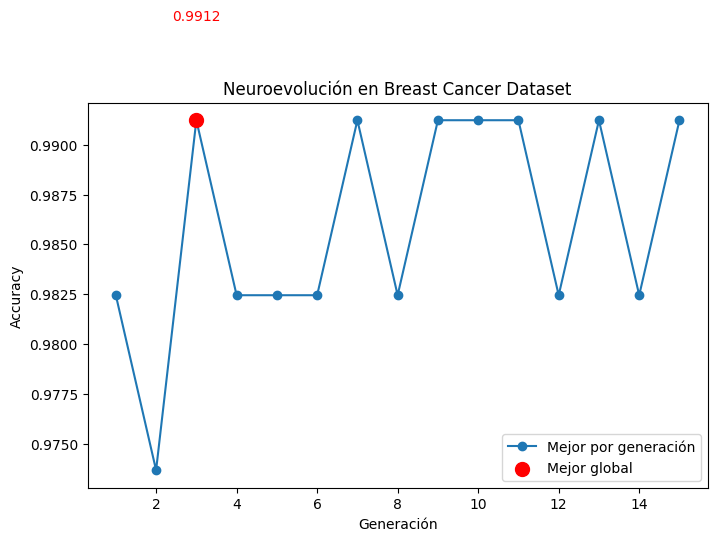

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt

# Cargar y preparar el dataset Breast Cancer

data = load_breast_cancer()
X, y = data.data, data.target
n_features = X.shape[1]

# Escalado de características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#  Función para construir la red neuronal

def build_model(architecture):
    model = keras.Sequential()
    model.add(keras.Input(shape=(X_train.shape[1],)))  # entrada
    for units in architecture[:-1]:  # capas ocultas
        model.add(keras.layers.Dense(int(units), activation="relu"))
    model.add(keras.layers.Dense(1, activation=str(architecture[-1])))  # salida binaria
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


# Fitness function

def fitness(individual):
    try:
        model = build_model(individual)
        model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
        _, acc = model.evaluate(X_test, y_test, verbose=0)
        return acc
    except Exception:
        return 0.0


# Inicialización de población
#
def create_individual():
    hidden1 = np.random.choice([8, 16, 32, 64])
    hidden2 = np.random.choice([8, 16, 32, 64])
    activation = np.random.choice(["sigmoid", "tanh", "relu"])
    return [hidden1, hidden2, activation]

def mutate(individual):
    if np.random.rand() < 0.3:
        individual[0] = np.random.choice([8, 16, 32, 64])
    if np.random.rand() < 0.3:
        individual[1] = np.random.choice([8, 16, 32, 64])
    if np.random.rand() < 0.3:
        individual[2] = np.random.choice(["sigmoid", "tanh", "relu"])
    return individual

def crossover(p1, p2):
    child = [p1[0], p2[1], p1[2]] if np.random.rand() < 0.5 else [p2[0], p1[1], p2[2]]
    return child


# Algoritmo Genético

population_size = 6
generations = 15

population = [create_individual() for _ in range(population_size)]
best_accs = []

# Mejor global
global_best_acc = 0
global_best_ind = None

for gen in range(generations):
    scores = [fitness(ind) for ind in population]
    best_idx = np.argmax(scores)
    best_ind = population[best_idx]
    best_acc = scores[best_idx]
    best_accs.append(best_acc)

    # guardar el mejor global
    if best_acc > global_best_acc:
        global_best_acc = best_acc
        global_best_ind = best_ind.copy()

    print(f"Gen {gen+1} | Mejor accuracy: {best_acc:.4f} | Arquitectura: {best_ind}")

    new_pop = [best_ind]
    while len(new_pop) < population_size:
        p1, p2 = random.sample(population, 2)
        child = crossover(p1, p2)
        child = mutate(child)
        new_pop.append(child)
    population = new_pop


# Resultados finales

print("\nEvolución del accuracy:", best_accs)
print("Mejor arquitectura global encontrada:", global_best_ind, "con accuracy", global_best_acc)


# Gráfico de evolución

plt.figure(figsize=(8,5))
plt.plot(range(1, generations+1), best_accs, marker="o", label="Mejor por generación")

# marcar el mejor global
best_gen = np.argmax(best_accs) + 1
plt.scatter(best_gen, global_best_acc, color="red", s=100, zorder=5, label="Mejor global")
plt.text(best_gen, global_best_acc + 0.005, f"{global_best_acc:.4f}", ha="center", color="red")

plt.xlabel("Generación")
plt.ylabel("Accuracy")
plt.title("Neuroevolución en Breast Cancer Dataset")
plt.legend()
plt.show()